In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [40]:
import torch
import torch.nn as nn
import torch.optim as optim

In a generalized linear model, $h$ is a link function and $T$ is an affine map (that is, a linear regressor). We set $g = h^{-1} \circ T$ to be our generalized linear model.

In [41]:
h = np.vectorize(lambda x : x) # modify h as needed
h_inv = np.vectorize(lambda x : x)

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [43]:
df = pd.read_csv("./data_synthetic/synthetic_data_1.csv", index_col=0)
df

,X,y
0,0.000000,0.037750
1,0.010101,0.099744
2,0.020202,0.142239
3,0.030303,0.120033
4,0.040404,0.187749
...,...,...
95,0.959596,2.974688
96,0.969697,2.962637
97,0.979798,2.960849
98,0.989899,3.005870


In [44]:
X = df["X"].to_numpy().reshape(-1, 1)
y = df["y"].to_numpy()


y_transformed = h(y)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

$$g(x) \approx y \Longleftrightarrow h(y) \approx T(x)$$

this is because $g(x) = h^{-1}\circ T(x)$

In [46]:
regr = LinearRegression()
regr.fit(X_train, h(y_train))

y_pred = h_inv(regr.predict(X_test))

print("Coefficients: \n", regr.coef_)
print(f"Mean squared error: {mean_squared_error(y_test, y_pred)}")
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Coefficients: 
 [2.98973349]
Mean squared error: 0.0009331936115029313
Coefficient of determination: 1.00


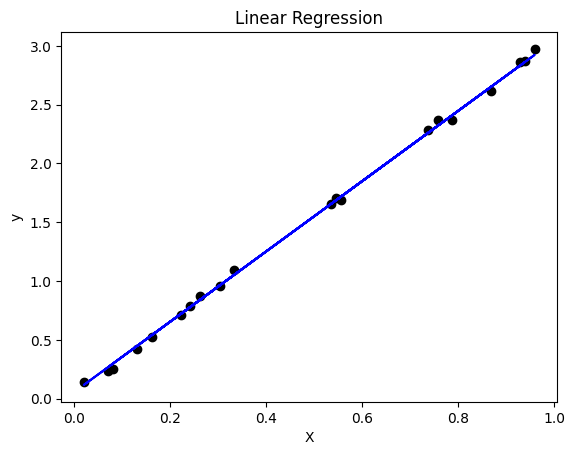

In [47]:
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred, color="blue")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression")
plt.show()